# Import initial utilities


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from timeit import timeit
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#preprocesing

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils.multiclass import unique_labels
#metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score
#algorithms
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm

%matplotlib inline

In [ ]:
# workdirectory = '/home/jazhiel/ML_Notebooks/Cosmology_ML/'
workdirectory = '/content/drive/MyDrive/Datos_Figuras_isidro/'

### Method for confusion matrix plots

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
    


np.set_printoptions(precision=2)

# Import GADGET DS


In [ ]:
data_dict = np.load(workdirectory + 'OUTFILE1M (1).npz') 
test_flags  = data_dict['test_flags']
test_hosts  = data_dict['test_hosts']
test_mass   = data_dict['test_mass']
test_labels = data_dict['test_labels']
test_input  = data_dict['test_input']
#test_snid   = dict_data['test_snid']
#test_labels = dict_data['test_labels']
print(test_mass)
print(np.sum(test_labels))

[-1.00e+00  2.72e+13  1.14e+13 ... -1.00e+00 -1.00e+00 -1.00e+00]
289964


# Data preprocessing

In [ ]:
dr1 = pd.DataFrame(test_input[0], columns = ['dr1'])
dr2 = pd.DataFrame(test_input[1], columns = ['dr2'])
dr3 = pd.DataFrame(test_input[2], columns = ['dr3'])
dr4 = pd.DataFrame(test_input[3], columns = ['dr4'])
dr5 = pd.DataFrame(test_input[4], columns = ['dr5'])
dr6 = pd.DataFrame(test_input[5], columns = ['dr6'])
dr7 = pd.DataFrame(test_input[6], columns = ['dr7'])
dr8 = pd.DataFrame(test_input[7], columns = ['dr8'])
dr9 = pd.DataFrame(test_input[8], columns = ['dr9'])
dr10 = pd.DataFrame(test_input[9], columns = ['dr10'])
#mass = pd.DataFrame(test_mass, columns = ['Halo_Mass'])
lbl = pd.DataFrame(test_labels, columns =['labels'])

# Select all features and create dataframe

In [ ]:
scaler = StandardScaler()
df = pd.concat([dr1, dr2, dr3, dr4, dr5, dr6, dr7, dr8, dr9, dr10, lbl], axis=1, ignore_index=False, sort=False)
df.describe()
#df_copy = pd.concat([dr1, dr2, dr3, dr4, dr5, dr6, dr7, dr8, dr9, dr10], axis = 1, ignore_index=False, sort=False)
#df_feat = pd.concat([dr1,lbl], axis = 1, ignore_index=False, sort=False)
#df_feat
#df_feat = pd.DataFrame(dr1)
#df_feat

,dr1,dr2,dr3,dr4,dr5,dr6,dr7,dr8,dr9,dr10,labels
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.040697,0.034862,0.031188,0.029510,0.023249,0.019781,0.015974,0.012721,0.009786,0.007440,0.289964
std,0.227756,0.189632,0.172109,0.165140,0.141545,0.128470,0.113819,0.100527,0.087283,0.074727,0.453746
min,-0.595585,-0.549892,-0.513209,-0.493975,-0.424237,-0.388504,-0.333991,-0.275244,-0.223792,-0.192789,0.000000
25%,-0.121499,-0.100307,-0.091526,-0.088415,-0.078871,-0.073475,-0.066620,-0.059508,-0.052420,-0.045206,0.000000
50%,0.013326,0.016408,0.016513,0.016246,0.014070,0.012956,0.010306,0.008146,0.006022,0.004334,0.000000
75%,0.172316,0.150792,0.138625,0.133218,0.114404,0.103466,0.091056,0.079689,0.068860,0.059217,1.000000
max,2.196388,1.440001,1.224202,1.120423,0.816344,0.678405,0.520247,0.408871,0.331112,0.266773,1.000000


# Concatenate and shuffle dataset, then select the training and testing set

In [ ]:
# df_0 = df.sort_values('labels').head(35604).sample(14300)
# df_1 = df.sort_values('labels').tail(14396).sample(14300) 
# df_1.labels.sum()
# df_r = pd.concat([df_0, df_1])

df_r = df

randomize = np.random.permutation(len(df_r.values))
data = df_r.values[randomize]

In [ ]:
# Define a size for your train set 
split = 0.8
ntrain = int(split * len(data))
indx = [ntrain]
train_set, test_set = np.split(data, indx)

split = 0.5
ntrain = int(split * len(test_set))
indx = [ntrain]
validation_set, test_test = np.split(test_set, indx)

In [ ]:
X_train = train_set[:, :-1]
y_train = train_set[:, -1]

X_val = validation_set[:, :-1]
y_val = validation_set[:, -1]

X_test = test_set[:, :-1]
y_test = test_set[:, -1]

In [ ]:
xscaler = StandardScaler()
xscaler.fit(X_train)
# apply transform
X_train_sc = xscaler.transform(X_train)
X_val_sc = xscaler.transform(X_val)
X_test_sc = xscaler.transform(X_test)

xscalerminmax = MinMaxScaler()
xscalerminmax.fit(X_train)
# apply transform
X_train_minmax = xscalerminmax.transform(X_train)
X_val_minmax = xscalerminmax.transform(X_val)
X_test_minmax = xscalerminmax.transform(X_test)

### Labels

In [ ]:
class_names=['Not in Halo','in Halo']

## Logistic regression


In [ ]:
Lg = LogisticRegression(random_state=0)

inicio = time.time()

# Código a medir
for j in range(100):
    y_pred = Lg.fit(X_train_sc, y_train).predict(X_test_sc)
# -------------

fin = time.time()
print("tiempo de ejecucción ",(fin-inicio)/100, "s promedio para 100 repeticiones") # 1.5099220275878906

tiempo de ejecucción  7.296123056411743 s promedio para 100 repeticiones


Normalized confusion matrix
[[0.91 0.09]
 [0.48 0.52]]


<Figure size 800x550 with 0 Axes>

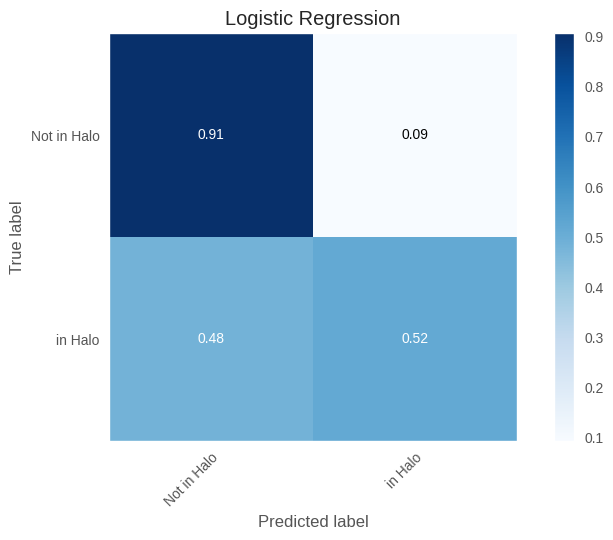

In [ ]:
# print(timeit('LogisticRegression(random_state=0).fit(X_train, y_trainl).predict(X_test)', number=500))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize = True,
                      title='Logistic Regression')
plt.grid(False)
plt.show()

y1=y_pred
y_pred=y1
r_probs = [0 for _ in range(len(y_test))]
rf_probs = Lg.predict_proba(X_test_sc)
rf_probs = rf_probs[:, 1]



# print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
# print('Random Forest: AUROC = %.3f' % (rf_auc))

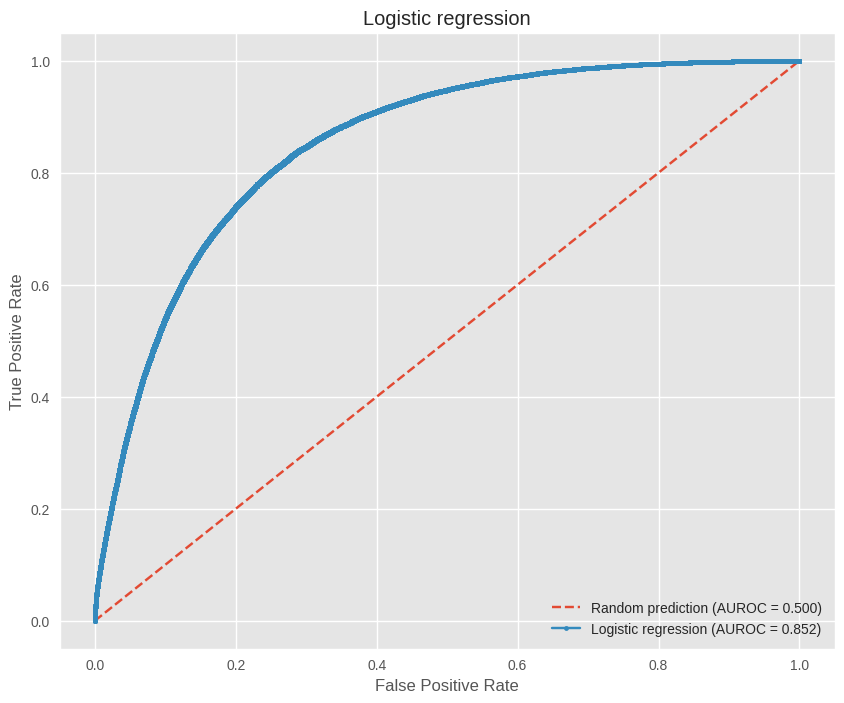

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10,8))

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Logistic regression (AUROC = %0.3f)' % rf_auc)
plt.title('Logistic regression')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc=4) # 
# Show plot
plt.grid(True)

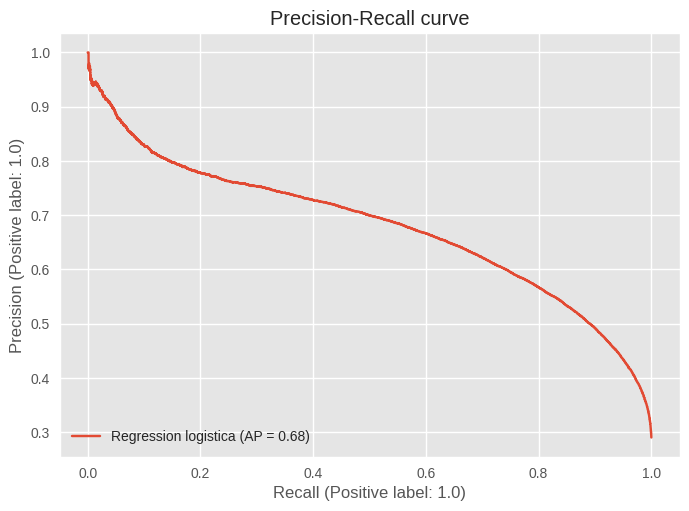

In [ ]:
display = PrecisionRecallDisplay.from_estimator(
    Lg, X_test_sc, y_test, name="Regression logistica"
)
_ = display.ax_.set_title("Precision-Recall curve")

In [ ]:
print("Precision: ",average_precision_score(y_test, y_pred),"\n")
print("recall: ",recall_score(y_test, y_pred, average='macro'),"\n")
print("f1_score: ",f1_score(y_test, y_pred, average='macro'),"\n")

Precision:  0.5001241805142617 

recall:  0.712829522822209 

f1_score:  0.7280858735857685 



## Gaussian Naive bayes

In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train_sc, y_train).predict(X_test_sc)


inicio = time.time()

# Código a medir
for j in range(100):
    y_pred = gnb.fit(X_train_sc, y_train).predict(X_test_sc)
# -------------

fin = time.time()
print("tiempo de ejecucción ",(fin-inicio)/100, "s promedio para 100 repeticiones")

tiempo de ejecucción  0.3322383618354797 s promedio para 100 repeticiones


Normalized confusion matrix
[[0.8  0.2 ]
 [0.27 0.73]]


<Figure size 800x550 with 0 Axes>

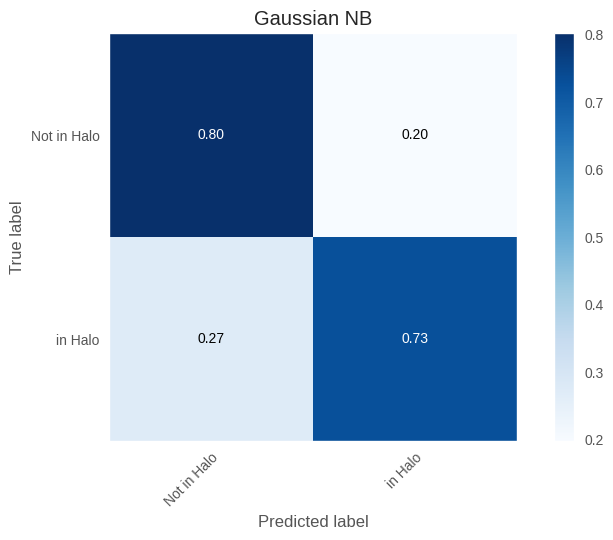

In [ ]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize = True,
                      title='Gaussian NB')
plt.grid(False)
plt.show()

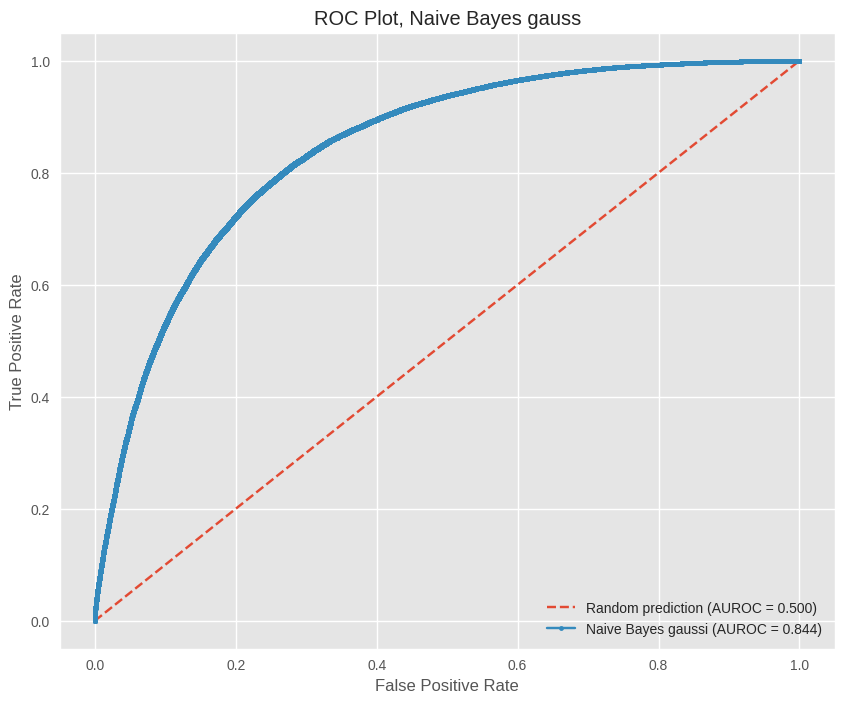

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = gnb.predict_proba(X_test)
rf_probs = rf_probs[:, 1]

plt.style.use('ggplot')
plt.figure(figsize=(10,8))

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
# print('Random Forest: AUROC = %.3f' % (rf_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Naive Bayes gaussi (AUROC = %0.3f)' % rf_auc)
plt.title('ROC Plot, Naive Bayes gauss')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc=4) # 
# Show plot
plt.grid(True)
# plt.savefig('/home/jazhiel/Escritorio/Maestria/Machine_Learning/IMG_Tesis/ROC_RF.png')
# plt.show()





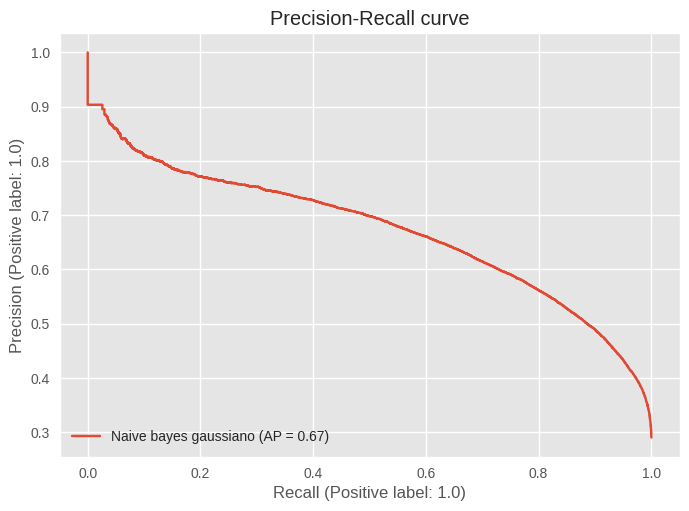

In [ ]:
# plot the precision-recall curves


display = PrecisionRecallDisplay.from_estimator(
    gnb, X_test_sc, y_test, name="Naive bayes gaussiano"
)
_ = display.ax_.set_title("Precision-Recall curve")

In [ ]:

print("Precision: ",average_precision_score(y_test, y_pred),"\n")
print("recall: ",recall_score(y_test, y_pred, average='macro'),"\n")
print("f1_score: ",f1_score(y_test, y_pred, average='macro'),"\n")

Precision:  0.5162410716693611 

recall:  0.7650964318003008 

f1_score:  0.7482851715851193 



## Naive bayes bernoulli

In [ ]:
ber = BernoulliNB()


inicio = time.time()

# Código a medir
for j in range(100):
    y_predber = ber.fit(X_train_sc, y_train).predict(X_test_sc)
# -------------

fin = time.time()
print("tiempo de ejecucción ",(fin-inicio)/100, "s promedio para 100 repeticiones")



y_pred = ber.fit(X_train, y_train).predict(X_test_sc)




tiempo de ejecucción  0.4172706937789917 s promedio para 100 repeticiones


Normalized confusion matrix
[[0.76 0.24]
 [0.25 0.75]]


<Figure size 800x550 with 0 Axes>

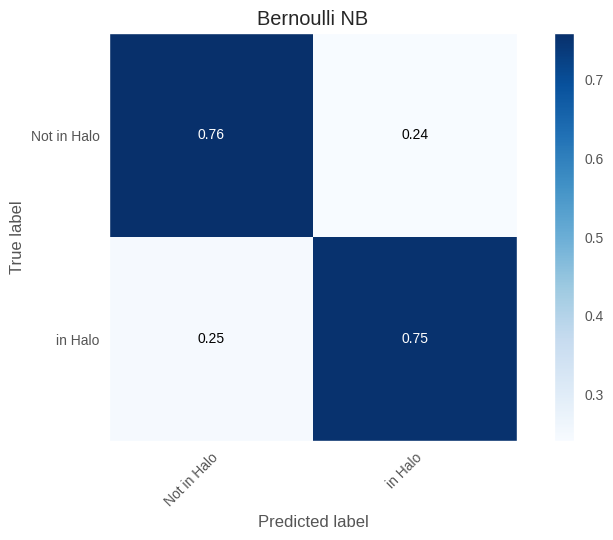

In [ ]:
plt.figure()
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize = True,
                      title='Bernoulli NB')
plt.grid(False)
# plt.show()


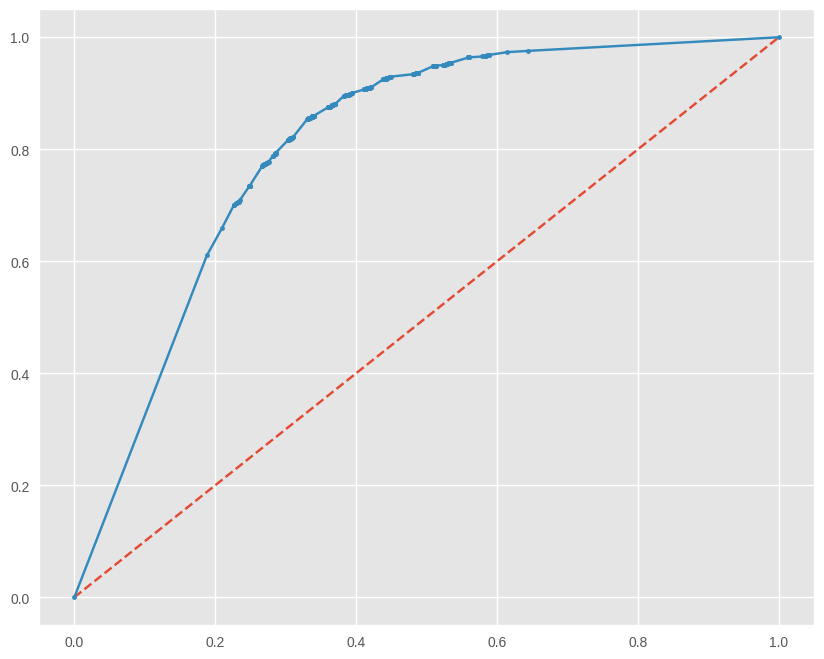

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = ber.predict_proba(X_test)
rf_probs = rf_probs[:, 1]

plt.style.use('ggplot')
plt.figure(figsize=(10,8))

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
# print('Random Forest: AUROC = %.3f' % (rf_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Naive Bayes Bernoulli (AUROC = %0.3f)' % rf_auc)

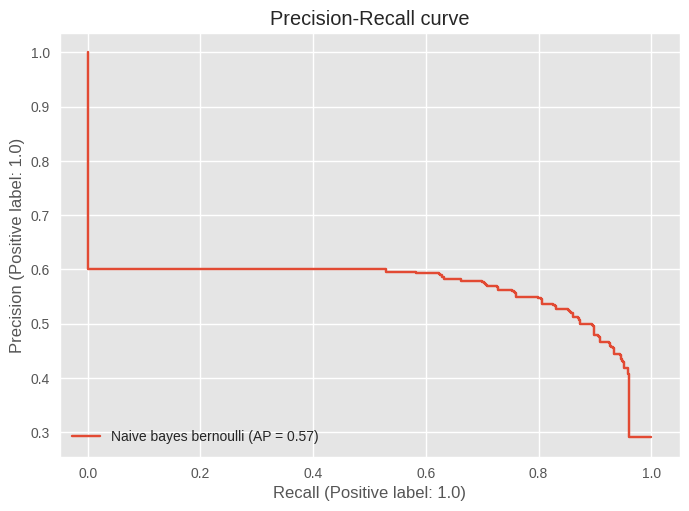

In [ ]:
# plot the precision-recall curves
display = PrecisionRecallDisplay.from_estimator(
    ber, X_test_sc, y_test, name="Naive bayes bernoulli"
)
_ = display.ax_.set_title("Precision-Recall curve")

In [ ]:
print("Precision: ",average_precision_score(y_test, y_pred),"\n")
print("recall: ",recall_score(y_test, y_pred, average='macro'),"\n")
print("f1_score: ",f1_score(y_test, y_pred, average='macro'),"\n")

Precision:  0.4945123583293422 

recall:  0.7562681876979314 

f1_score:  0.7298338548425745 



## Multinomial Naive Bayes

In [ ]:
mult = MultinomialNB(fit_prior=False)

h=0
g=0

# y_pred = mult.fit(X_train, y_train).predict(X_test)


inicio = time.time()

# Código a medir
for j in range(100):
    y_pred = mult.fit(X_train_minmax, y_train).predict(X_test_minmax)
# -------------

fin = time.time()
print("tiempo de ejecucción ",(fin-inicio)/100, "s promedio para 100 repeticiones")


tiempo de ejecucción  0.30969871520996095 s promedio para 100 repeticiones


Normalized confusion matrix
[[0.55 0.45]
 [0.44 0.56]]


<Figure size 800x550 with 0 Axes>

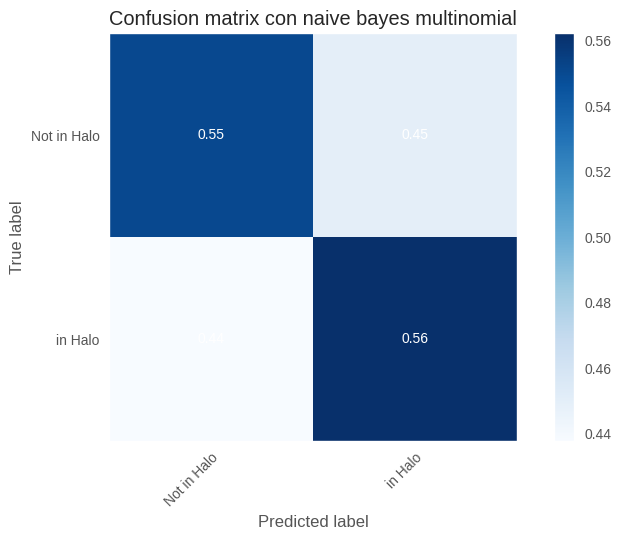

In [ ]:
plt.figure()
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize = True,
                      title='Confusion matrix con naive bayes multinomial')
plt.grid(False)
plt.show()

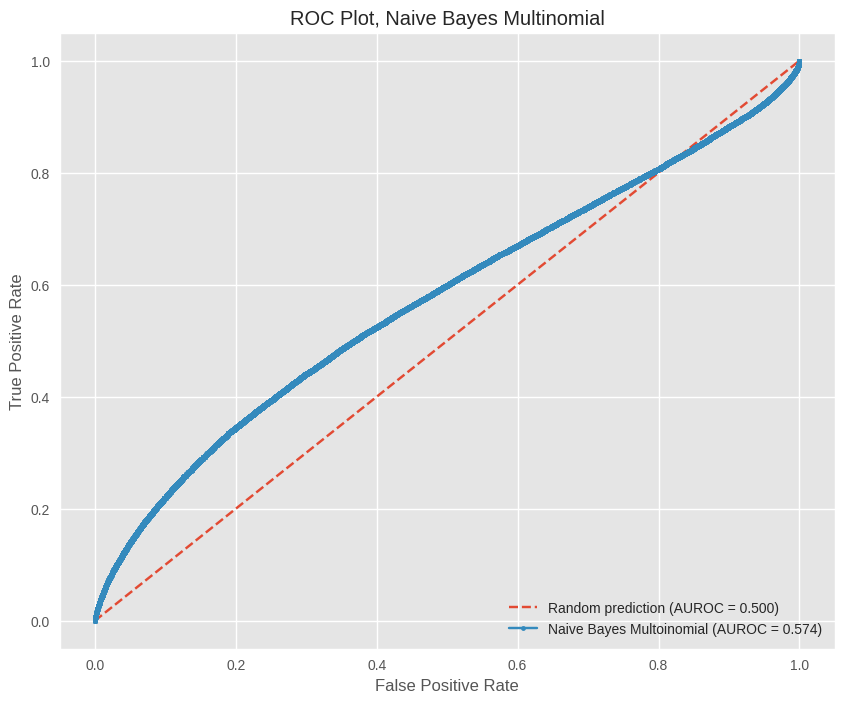

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = mult.predict_proba(X_test_minmax)
rf_probs = rf_probs[:, 1]

plt.style.use('ggplot')
plt.figure(figsize=(10,8))

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
# print('Random Forest: AUROC = %.3f' % (rf_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Naive Bayes Multoinomial (AUROC = %0.3f)' % rf_auc)
plt.title('ROC Plot, Naive Bayes Multinomial')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc=4) # 
# Show plot
plt.grid(True)
# plt.savefig('/home/jazhiel/Escritorio/Maestria/Machine_Learning/IMG_Tesis/ROC_RF.png')
# plt.show()




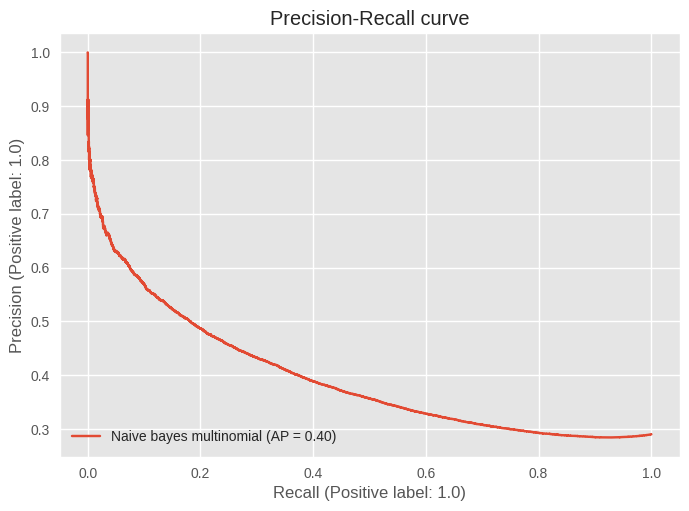

In [ ]:
# plot the precision-recall curves

display = PrecisionRecallDisplay.from_estimator(
    mult, X_test_minmax, y_test, name="Naive bayes multinomial"
)
_ = display.ax_.set_title("Precision-Recall curve")

In [ ]:
print("Precision: ",average_precision_score(y_test, y_pred),"\n")
print("recall: ",recall_score(y_test, y_pred, average='macro'),"\n")
print("f1_score: ",f1_score(y_test, y_pred, average='macro'),"\n")

Precision:  0.3173190744885559 

recall:  0.5562500195733401 

f1_score:  0.5294198256485766 



## Naive bayes complement

In [ ]:
com = ComplementNB()

inicio = time.time()

# Código a medir
for j in range(100):
    y_pred = com.fit(X_train_minmax, y_train).predict(X_test_minmax)
# -------------

fin = time.time()
print("tiempo de ejecucción ",(fin-inicio)/100, "s promedio para 100 repeticiones")


ComplementNB()
y_pred = com.fit(X_train_minmax, y_train).predict(X_test_minmax)


tiempo de ejecucción  0.31429792404174806 s promedio para 100 repeticiones


Normalized confusion matrix
[[0.55 0.45]
 [0.44 0.56]]


<Figure size 800x550 with 0 Axes>

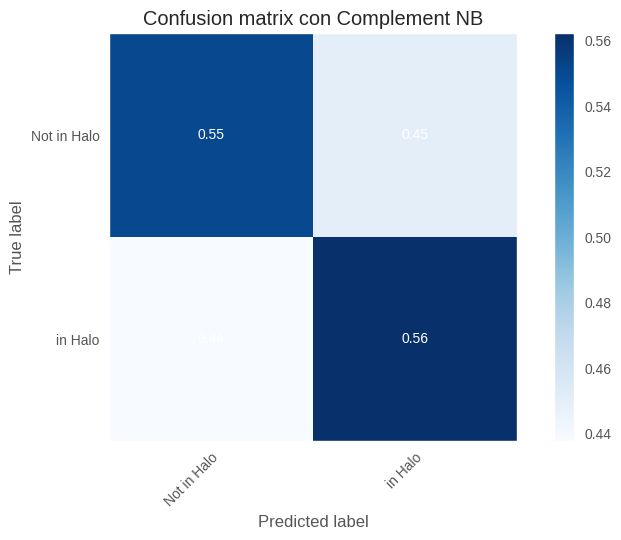

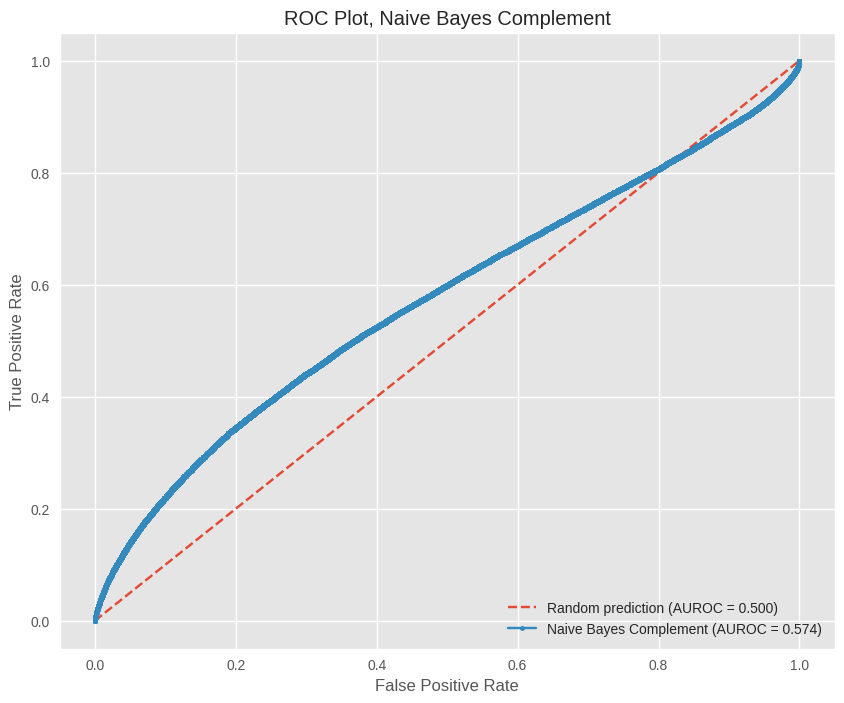

In [ ]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize = True,
                      title='Confusion matrix con Complement NB')
plt.grid(False)
# plt.show()


r_probs = [0 for _ in range(len(y_test))]
rf_probs = com.predict_proba(X_test_minmax)
rf_probs = rf_probs[:, 1]

plt.style.use('ggplot')
plt.figure(figsize=(10,8))

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
# print('Random Forest: AUROC = %.3f' % (rf_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Naive Bayes Complement (AUROC = %0.3f)' % rf_auc)
plt.title('ROC Plot, Naive Bayes Complement')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc=4) # 
# Show plot
plt.grid(True)


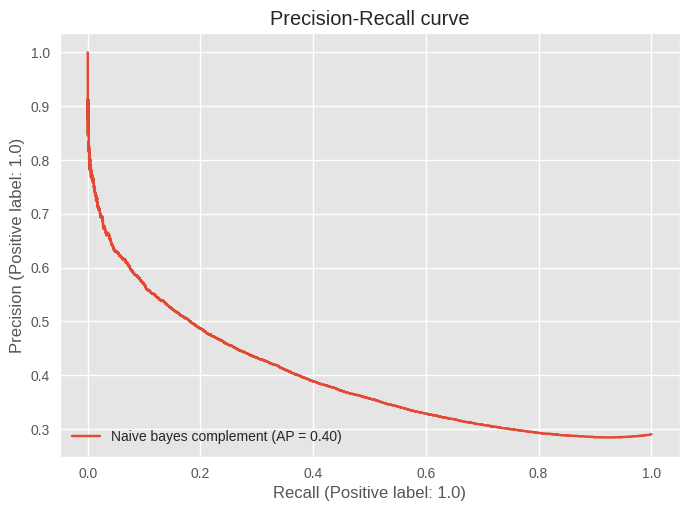

In [ ]:
# plot the precision-recall curves

display = PrecisionRecallDisplay.from_estimator(
    com, X_test_minmax, y_test, name="Naive bayes complement"
)
_ = display.ax_.set_title("Precision-Recall curve")

In [ ]:
print("Precision: ",average_precision_score(y_test, y_pred),"\n")
print("recall: ",recall_score(y_test, y_pred, average='macro'),"\n")
print("f1_score: ",f1_score(y_test, y_pred, average='macro'),"\n")

Precision:  0.3173190744885559 

recall:  0.5562500195733401 

f1_score:  0.5294198256485766 



## Categorical Naive Bayes

In [ ]:
cat = CategoricalNB(fit_prior=True, alpha=0.8)
inicio = time.time()

# Código a medir
for j in range(100):
    y_pred = cat.fit(X_train_minmax, y_train).predict(X_test_minmax)
# -------------

fin = time.time()
print("tiempo de ejecucción ",(fin-inicio)/100, "s promedio para 100 repeticiones")

y_pred = cat.fit(np.exp(X_train_minmax), y_train).predict(np.exp(X_test_minmax))

tiempo de ejecucción  0.5960745310783386 s promedio para 100 repeticiones


Normalized confusion matrix
[[0.97 0.03]
 [0.81 0.19]]


<Figure size 800x550 with 0 Axes>

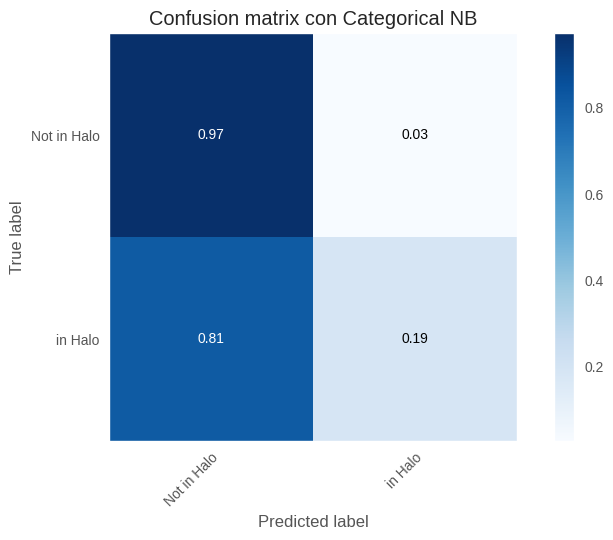

In [ ]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize = True,
                      title='Confusion matrix con Categorical NB')
plt.grid(False)
plt.show()


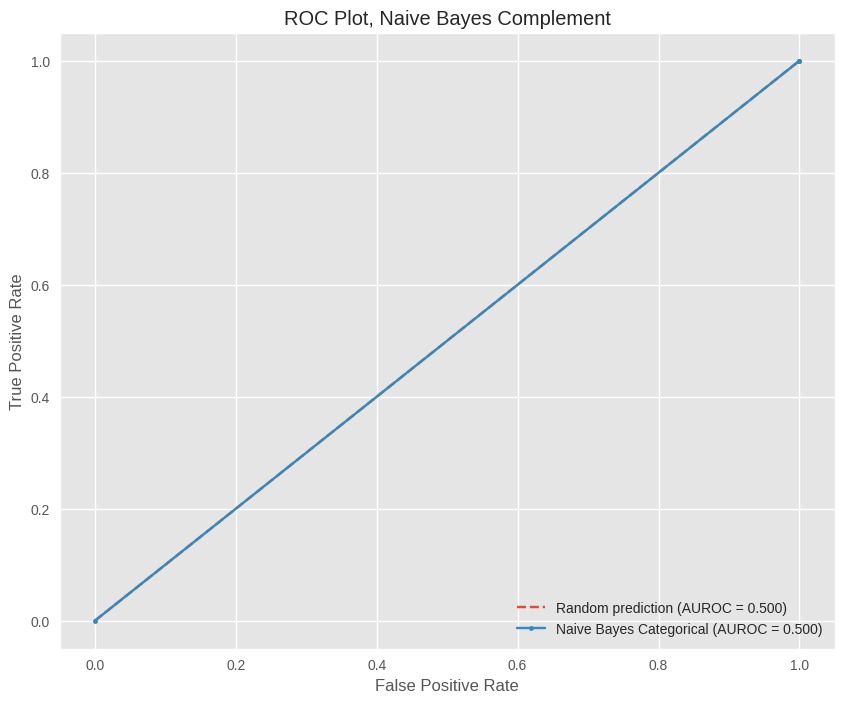

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = cat.predict_proba(X_test_minmax)
rf_probs = rf_probs[:, 1]

plt.style.use('ggplot')
plt.figure(figsize=(10,8))

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
# print('Random Forest: AUROC = %.3f' % (rf_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Naive Bayes Categorical (AUROC = %0.3f)' % rf_auc)
plt.title('ROC Plot, Naive Bayes Complement')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc=4) # 
# Show plot
plt.grid(True)

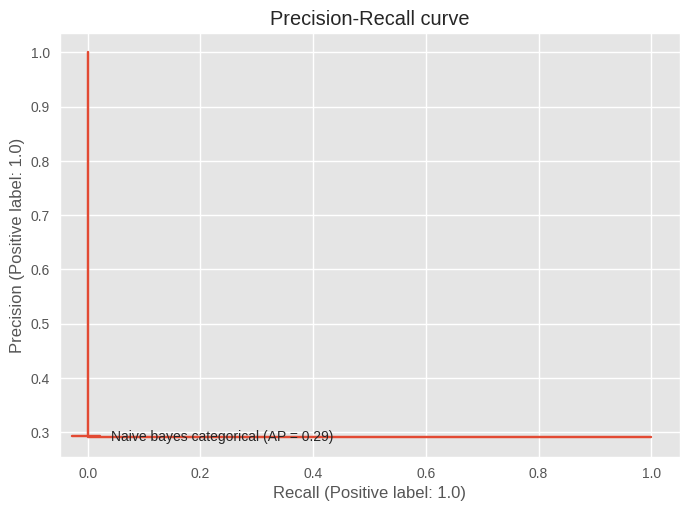

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = cat.predict_proba(X_test_minmax)
rf_probs = rf_probs[:, 1]

display = PrecisionRecallDisplay.from_estimator(
    cat, X_test_minmax, y_test, name="Naive bayes categorical"
)
_ = display.ax_.set_title("Precision-Recall curve")

In [ ]:
print("Precision: ",average_precision_score(y_test, y_pred),"\n")
print("recall: ",recall_score(y_test, y_pred, average='macro'),"\n")
print("f1_score: ",f1_score(y_test, y_pred, average='macro'),"\n")

Precision:  0.37163342558779555 

recall:  0.5786520305560511 

f1_score:  0.5695076441669216 



## Decision Tree

In [ ]:
from sklearn import metrics

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=15, class_weight='balanced')
dt = dt.fit(X_train_sc, y_train)
#Predict the response for test dataset
ypred = dt.predict(X_test_sc)
#Model accuracy, how often is the classifier correct
#print(cross_val_score(dt1, X1.reshape(-1,1), y, cv=6))
print('Training and testing, raw data, all features \n')
print("Accuracy:", metrics.accuracy_score(y_test, ypred))
for i, score_tree in enumerate(cross_val_score(dt, X_test_sc, y_test, cv = 10)):
    print('Decision tree accuracy for the %d score: %0.2f' % (i, score_tree))
score_tree=cross_val_score(dt, X_test_sc ,y_test, cv=10)
#score_tree
cv_scores = []
print("Decision Tree Accuracy: %0.2f (+/- %0.2f)" % (score_tree.mean(), score_tree.std() * 2 ))
cv_score = score_tree.mean()
cv_scores.append(cv_score)

Training and testing, raw data, all features 

Accuracy: 0.785035
Decision tree accuracy for the 0 score: 0.77
Decision tree accuracy for the 1 score: 0.76
Decision tree accuracy for the 2 score: 0.76
Decision tree accuracy for the 3 score: 0.77
Decision tree accuracy for the 4 score: 0.77
Decision tree accuracy for the 5 score: 0.77
Decision tree accuracy for the 6 score: 0.77
Decision tree accuracy for the 7 score: 0.77
Decision tree accuracy for the 8 score: 0.77
Decision tree accuracy for the 9 score: 0.76
Decision Tree Accuracy: 0.77 (+/- 0.01)


<ipython-input-99-3182b189e0d0>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Random (chance) Prediction: AUROC = 0.500
Decision Tree: AUROC = 0.817


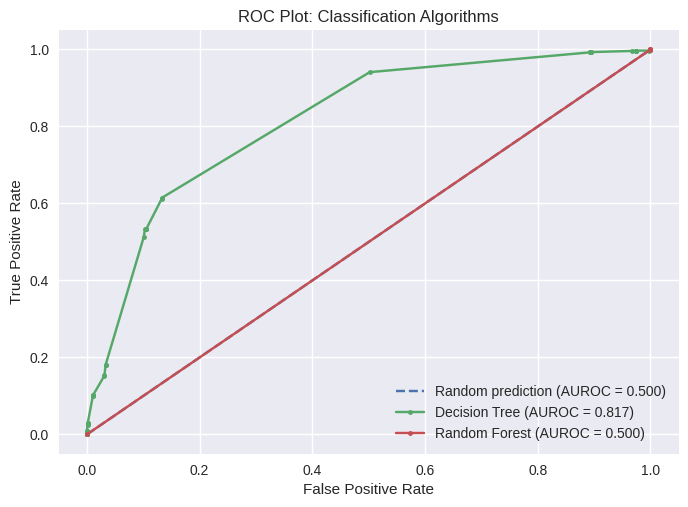

In [ ]:
plt.style.use('seaborn')


r_probs = [0 for _ in range(len(y_test))]
dt_probs = dt.predict_proba(X_test)
dt_probs = dt_probs[:, 1]

r_auc = roc_auc_score(y_test, r_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Decision Tree: AUROC = %.3f' % (dt_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.title('ROC Plot: Classification Algorithms')

#r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
#rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
#plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
#plt.title('ROC Plot, $\delta r$')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc=4) # 
# Show plot
#plt.savefig('/home/jazhiel/Escritorio/Maestria/Machine_Learning/IMG_Tesis/ROC_DT.jpg')
plt.show()


# SVM

In [ ]:
clf = svm.SVC(probability=True, C=1, kernel='sigmoid', verbose=1, max_iter=500, cache_size=3000)
# cache_size -> cache memory in Mb.

inicio = time.time()

# Código a medir
y_pred = clf.fit(X_train_sc, y_train).predict(X_test_sc)

fin = time.time()
print("tiempo de ejecucción ",(fin-inicio)/1, "s promedio para 1 repeticiones") # 1.5099220275878906

[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


tiempo de ejecucción  747.2140588760376 s promedio para 1 repeticiones


Normalized confusion matrix
[[0.67 0.33]
 [0.16 0.84]]


<Figure size 800x550 with 0 Axes>

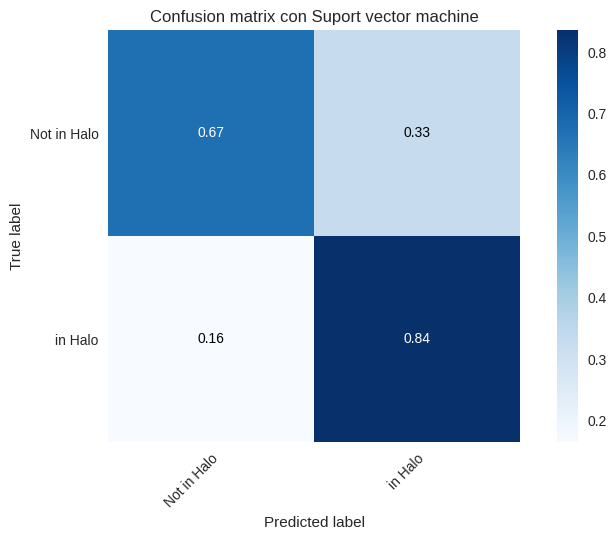

In [ ]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize = True,
                      title='Confusion matrix con Suport vector machine')
plt.grid(False)
plt.show()

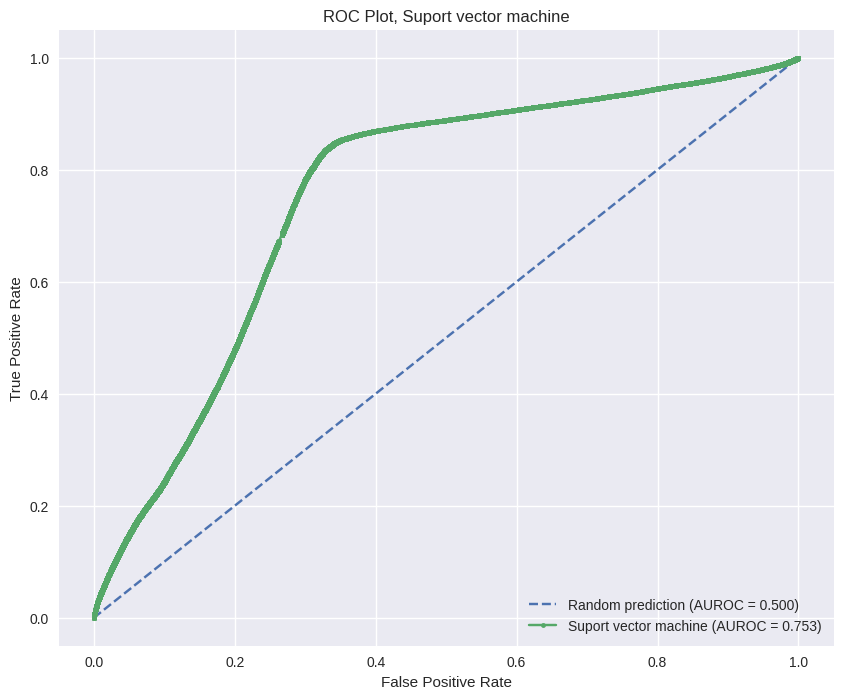

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = clf.predict_proba(X_test_sc)
rf_probs = rf_probs[:, 1]

plt.figure(figsize=(10,8))

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
# print('Random Forest: AUROC = %.3f' % (rf_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Suport vector machine (AUROC = %0.3f)' % rf_auc)
plt.title('ROC Plot, Suport vector machine')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc=4) # 
# Show plot
plt.grid(True)

In [ ]:
print("Precision: ",average_precision_score(y_test, y_pred),"\n")
print("recall: ",recall_score(y_test, y_pred, average='macro'),"\n")
print("f1_score: ",f1_score(y_test, y_pred, average='macro'),"\n")

Precision:  0.4731357659079536 

recall:  0.7529819368505786 

f1_score:  0.702203038824319 



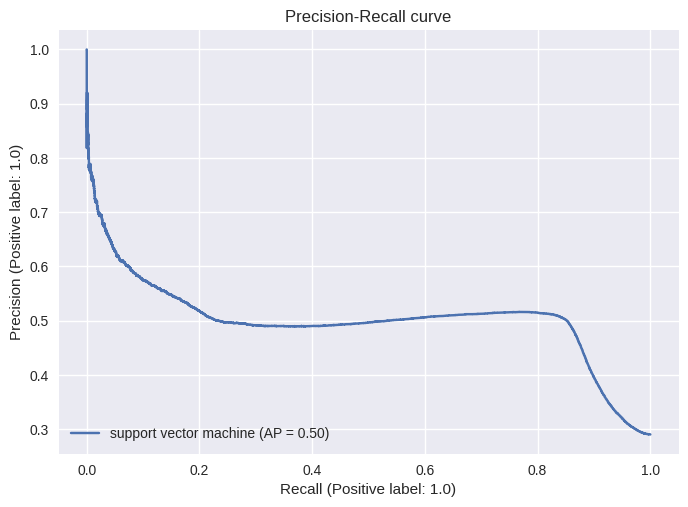

In [ ]:
# plot the precision-recall curves
display = PrecisionRecallDisplay.from_estimator(
    clf, X_test_sc, y_test, name="support vector machine"
)
_ = display.ax_.set_title("Precision-Recall curve")

In [ ]:
rf=RandomForestClassifier(n_estimators=200, max_depth=10, n_jobs=-1,
                          criterion = 'entropy', class_weight='balanced')

## n_jobs = -1 tells my computer to use all its cores, I have only 2, so it runs on 2 cores
#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)



RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, n_estimators=200, n_jobs=-1)

# ROC curve

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.869


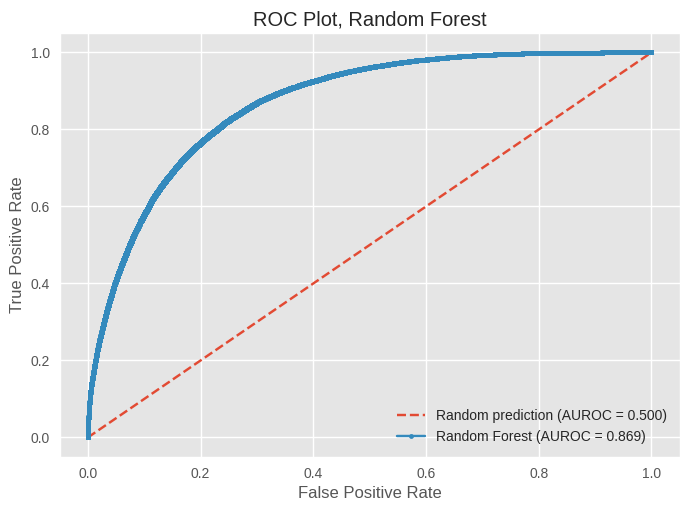

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(X_test)
rf_probs = rf_probs[:, 1]

plt.style.use('ggplot')
# plt.figure(figsize=(10,8))

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.title('ROC Plot, Random Forest')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc=4) # 
# Show plot
plt.grid(True)
# plt.savefig('/home/jazhiel/Escritorio/Maestria/Machine_Learning/IMG_Tesis/ROC_RF.png')
plt.show()

$\delta_{r1}$     0.005424
$\delta_{r2}$     0.011823
$\delta_{r3}$     0.028250
$\delta_{r4}$     0.053822
$\delta_{r5}$     0.184545
$\delta_{r6}$     0.287307
$\delta_{r7}$     0.199330
$\delta_{r8}$     0.130892
$\delta_{r9}$     0.065413
$\delta_{r10}$    0.033195
dtype: float64


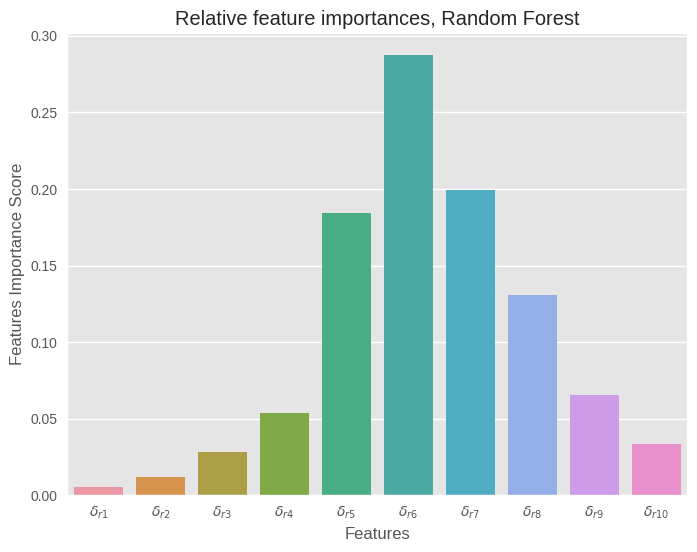

In [ ]:
features = ['$\delta_{r1}$', '$\delta_{r2}$', '$\delta_{r3}$', '$\delta_{r4}$', '$\delta_{r5}$', '$\delta_{r6}$', '$\delta_{r7}$', '$\delta_{r8}$', '$\delta_{r9}$', '$\delta_{r10}$']
feature_imp = pd.Series(rf.feature_importances_,index=features)
print(feature_imp)
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
# Creating a bar plot
sns.barplot(x=feature_imp.index, y=feature_imp)
# Add labels to your graph
plt.xlabel('Features')
plt.ylabel('Features Importance Score')
plt.title("Relative feature importances, Random Forest")
plt.legend()
#plt.savefig('/home/jazhiel/Escritorio/Maestria/Machine_Learning/IMG_Tesis/features_RF.png')
plt.show()

## ANN



In [ ]:
import tensorflow as tf
ann_model = tf.keras.models.load_model('/content/drive/MyDrive/Datos_Figuras_isidro/new_model.h5')

ann_y_pred = ann_model.predict(X_test_minmax)

# poner curva roc de la  ann

#predict_prob=model.predict([testa,testb])

#predict_classes=np.argmax(ann_y_pred,axis=1)

6250/6250 [==============================] - 11s 2ms/step


In [ ]:
from sklearn.metrics import roc_curve
y_pred_keras = ann_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

6250/6250 [==============================] - 11s 2ms/step


NameError: ignored

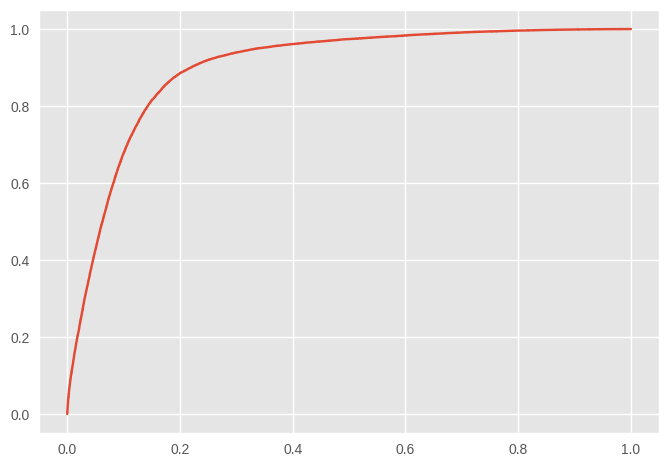

In [ ]:
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))

In [ ]:
predict_classes.sum()

In [ ]:
# r_probs = [0 for _ in range(len(y_test))]
# rf_probs = predict_classes
# rf_probs = rf_probs#[:, 1]

# plt.style.use('ggplot')
# # plt.figure(figsize=(10,8))

# r_auc = roc_auc_score(y_test, r_probs)
# rf_auc = roc_auc_score(y_test, rf_probs)

# print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
# print('Random Forest: AUROC = %.3f' % (rf_auc))

# r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
# rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
# plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
# plt.plot(rf_fpr, rf_tpr, marker='.', label='ANN (AUROC = %0.3f)' % rf_auc)
# plt.title('ROC Plot, Random Forest')
# # Axis labels
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# # Show legend
# plt.legend(loc=4) # 
# # Show plot
# plt.grid(True)
# # plt.savefig('/home/jazhiel/Escritorio/Maestria/Machine_Learning/IMG_Tesis/ROC_RF.png')
# plt.show()

# Learning curve

In [ ]:
start_time = time.time()
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(rf, 
                                                        X, 
                                                        ylabels,
                                                        # Number of folds in cross-validation
                                                        cv=3,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
print('---elapsed time = %s seconds ---' % (time.time()- start_time))

In [ ]:
X.shape

In [ ]:
#Create means and standard deviations for train set scores
plt.style.use('ggplot')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color='r',  label="Training score")
plt.plot(train_sizes, test_mean, color='b', label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes,
                 train_mean - train_std,
                 train_mean + train_std,
                 color="r", alpha =0.15)

plt.fill_between(train_sizes,
                 test_mean - test_std,
                 test_mean + test_std,
                 color="b", alpha = 0.15)

# Create plot

#plt.tight_layout()
plt.title("Learning Curve, Random Forest Classifier") # All Features, ENZO dataset")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.grid(True)
plt.show()

## Codigo curvas roc

6250/6250 [==============================] - 11s 2ms/step


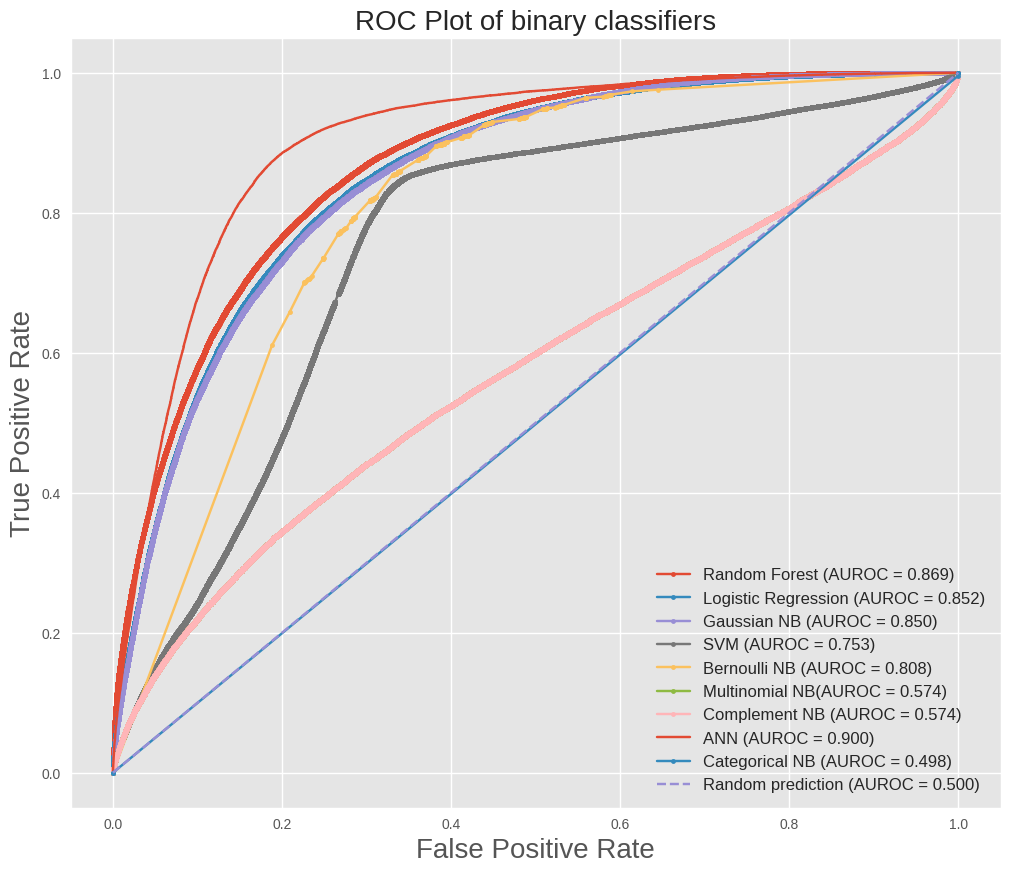

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(X_test)
rf_probs = rf_probs[:, 1]

plt.style.use('ggplot')
plt.figure(figsize=(12,10))

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

#print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
#print('Random Forest: AUROC = %.3f' % (rf_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.title('ROC Plot of binary classifiers', fontsize = 20)
# Axis labels
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
# Show legend
#plt.legend(loc=4) # 
# Show plot
plt.grid(True)

plt.legend(loc=4) # 
# -------------------------------------------------

r_probs = [0 for _ in range(len(y_test))]
rf_probs = Lg.predict_proba(X_test_sc)
rf_probs = rf_probs[:, 1]


r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % rf_auc)


plt.legend(loc=4) # 

# ----------------------------------------------


rf_probs = gnb.predict_proba(X_test_sc)
rf_probs = rf_probs[:, 1]

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)


r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

plt.plot(rf_fpr, rf_tpr, marker='.', label='Gaussian NB (AUROC = %0.3f)' % rf_auc)

# Show legend
plt.legend(loc=4) # 

# --------------------------------------------------------



r_probs = [0 for _ in range(len(y_test))]
rf_probs = clf.predict_proba(X_test_sc)
rf_probs = rf_probs[:, 1]


r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
# print('Random Forest: AUROC = %.3f' % (rf_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(rf_fpr, rf_tpr, marker='.', label='SVM (AUROC = %0.3f)' % rf_auc)


plt.legend(loc=4) # 

# ---------------------------------------------------



r_probs = [0 for _ in range(len(y_test))]
rf_probs = ber.predict_proba(X_test)
rf_probs = rf_probs[:, 1]

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
# print('Random Forest: AUROC = %.3f' % (rf_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Bernoulli NB (AUROC = %0.3f)' % rf_auc)
plt.legend(loc=4) # 

plt.grid(True)

# ------------------------------




r_probs = [0 for _ in range(len(y_test))]
rf_probs = mult.predict_proba(X_test_minmax)
rf_probs = rf_probs[:, 1]

# plt.style.use('ggplot')
# plt.figure(figsize=(10,8))

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
# print('Random Forest: AUROC = %.3f' % (rf_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
#plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Multinomial NB(AUROC = %0.3f)' % rf_auc)


# plt.legend(loc=4) # 

# --------------------------------------

r_probs = [0 for _ in range(len(y_test))]
rf_probs = com.predict_proba(X_test_minmax)
rf_probs = rf_probs[:, 1]

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
# print('Random Forest: AUROC = %.3f' % (rf_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Complement NB (AUROC = %0.3f)' % rf_auc)

# # Show legend
# plt.legend(loc=4) # 


##########

y_pred_keras = ann_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.plot(fpr_keras, tpr_keras, label='ANN (AUROC = {:.3f})'.format(auc_keras))
plt.legend(loc=4, fontsize = 12) 


# --------------------------------



r_probs = [0 for _ in range(len(y_test))]
rf_probs = cat.predict_proba(X_test)
rf_probs = rf_probs[:, 1]

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Categorical NB (AUROC = %0.3f)' % rf_auc)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)


# Show legend
plt.legend(loc=4, fontsize = 12) # 

# ------------------------------------------


# y_pred_keras = ann_model.predict(X_test).ravel()
# fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

# from sklearn.metrics import auc
# auc_keras = auc(fpr_keras, tpr_keras)

# plt.plot(fpr_keras, tpr_keras, label='ANN (AUROC = {:.3f})'.format(auc_keras))
# plt.legend(loc=4, fontsize = 12) 
